Q1. Perform sentiment analysis on YouTube comments

Q2. Perform EDA for positive sentences

Q3. Perform EDA for negative sentences

## Sentiment - 

For example let's say you are a celebrity, so as a celebrity you looks beautiful. that means you have a positive sentiment for that celebrity.

Let's say that you say that guy looks ugly that means you have negative sentiment for that particular guy.

One last example is let's say someone asks you how I am looking and you replied yeah you are looking average means you have a neutral sentiment

# Performing Sentiment Analysis

In [1]:
import numpy as np #Used in numerical computations in my data.
import pandas as pd #Used in data manipulation, data extraction, data filtering. So it is used in data manipulation.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments = pd.read_csv("F:/Data set Python/Data Analytics Real-World Projects in Python/1-Youtube Text Data Analysis/GBcomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


#### You have to perform sentiment analysis on the basis of this comment_text feature given

In [4]:
!pip install textblob

In [5]:
from textblob import TextBlob

In [6]:
TextBlob("It's more accurate to call it the (1000) be...").sentiment.polarity

0.45000000000000007

In [7]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

The column column_text is having 28 missing values

In [8]:
comments.dropna(inplace=True)

In [9]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [10]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [11]:
comments['polarity']=polarity

In [12]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


# Wordcloud representation of Sentiments

Q2. Perform EDA for positive sentiment

In [13]:
comments_positive=comments[comments['polarity']==1]

In [14]:
comments_positive.shape

(20400, 5)

In [15]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


Word cloud is a tool that tells how important our word is in some huge chunk of data. More bigger the word, the more important the word is.

In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
stopwords=set(STOPWORDS)

In [19]:
total_comments=''.join(comments_positive['comment_text'])

In [24]:
# total_comments

In [25]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

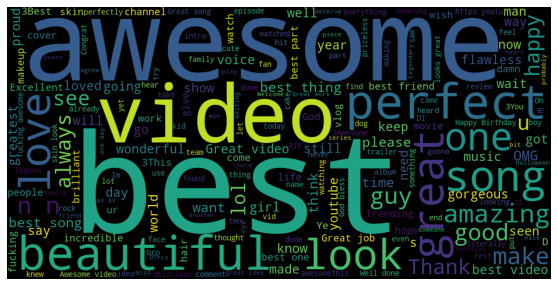

In [26]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Q3. Perform EDA for negative sentiment

In [31]:
comments_negative=comments[comments['polarity']==-1]

In [28]:
total_comments=''.join(comments_negative['comment_text'])

In [29]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

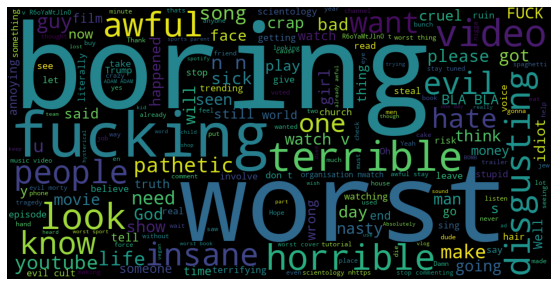

In [30]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Analyze Trending Tags and Views of YouTube

Q4. Analyzing tags column, what are trending tags on YouTube?

Q5. Perform analysis on likes, views & Dislikes and find how they are co-related with each other

In [ ]:
videos=pd.read_csv("F:/Data set Python/Data Analytics Real-World Projects in Python/1-Youtube Text Data Analysis/USvideos.csv",error_bad_lines=False)

In [ ]:
videos.head()

In [ ]:
tags_complete=' '.join(videos['tags'])

In [ ]:
tags_complete

In [ ]:
import re 

In [ ]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete) #Replace all except a to z and A to Z with a space.

In [ ]:
tags

In [ ]:
tags=re.sub(' +',' ',tags) #Replace all the extra spaces with only 1 space

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis("off")

## Next
Q5. Perform analysis on likes, views & Dislikes and find how they are co-related with each other

In [ ]:
sns.regplot(data=videos,x='views',y='likes')
plt.title("Regression Plot for views & likes")

In [ ]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title("Regression Plot for views & dislikes")

In [ ]:
df_corr=videos[['views','likes','dislikes']]

In [ ]:
df_corr.corr()

In [ ]:
sns.heatmap(df_corr.corr())

In [ ]:
sns.heatmap(df_corr.corr(),annot=True)

# Perform Emoji's Analysis

Q6. Analyze Emoji's in comment

In [ ]:
comments.head()

In [ ]:
comments['comment_text'][1]

In [ ]:
print('\U0001F600')

In [ ]:
!pip install emoji

In [ ]:
import emoji

In [ ]:
# !pip install regex
!pip install --pre --upgrade PACKAGE==VERSION.VERSION.VERSION

In [ ]:
!pip install regex
import regex

In [ ]:
len(comments)

In [ ]:
# print(emoji.UNICODE_EMOJI)

In [ ]:
comment=comments['comment_text'][1]

In [ ]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

In [ ]:
str=''
for i in comments['comment_text']:
    list1=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list1:
        str=str+ele

In [ ]:
len(str)

In [ ]:
str

In [ ]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [ ]:
result

In [ ]:
result.items()

In [ ]:
final={}
for key,value in sorted(result.items(), key= lambda item:item[1]):
    final[key]=value

In [ ]:
keys=[*final.keys()]

In [ ]:
keys

In [ ]:
values=[*final.values()]

In [ ]:
values

In [ ]:
df=pd.DataFrame({"chars":keys[-20:],"num":values[-20:]})

In [ ]:
df

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace=go.Bar(
x=df["chars"],
y=df["num"])

iplot([trace])

# Prepared by Yash Kumar Jha